In [ ]:
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa
!pip install ipython-sql extension

In [24]:
%load_ext sql

In [25]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
%sql ibm_db_sa://username:password@host:50000/BLUDB

In [12]:
import pandas

In [19]:
chicago_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

Creating a table on the IBM-DB2 database, using downloaded csv file. (syntax: --persist)

In [42]:
%sql --persist chicago_data

 * ibm_db_sa://gwn73718:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago_data'

Querying the dataset

In [43]:
%sql SELECT * FROM chicago_data limit 5;

 * ibm_db_sa://gwn73718:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [51]:
#Number of rows in the dataset

%sql SELECT COUNT (*) as "Total rows" FROM chicago_data; 

 * ibm_db_sa://gwn73718:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


Total rows
78


In [53]:
# Community areas in Chicago with hardship index > 50.0

%sql SELECT COUNT (*) AS "H_index > 50" FROM chicago_data WHERE hardship_index > 50;

 * ibm_db_sa://gwn73718:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


H_index > 50
38


In [56]:
# maximum value of hardship index

%sql SELECT MAX(hardship_index) AS "Max_H_index" FROM chicago_data;

 * ibm_db_sa://gwn73718:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


Max_H_index
98.0


In [61]:
%%sql
SELECT community_area_name FROM chicago_data
WHERE hardship_index = (SELECT MAX(hardship_index)FROM chicago_data);

 * ibm_db_sa://gwn73718:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [62]:
#community with PCI > 60k

%sql SELECT community_area_name FROM chicago_data WHERE per_capita_income_ > 60000 

 * ibm_db_sa://gwn73718:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


In [71]:
# plot between PCI and H_index

Plot = %sql SELECT per_capita_income_ , hardship_index FROM chicago_data

 * ibm_db_sa://gwn73718:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


In [80]:
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
plot = Plot.DataFrame()

Y = plot['per_capita_income_']
X = plot['hardship_index']

Text(0, 0.5, 'per_capita_income_')

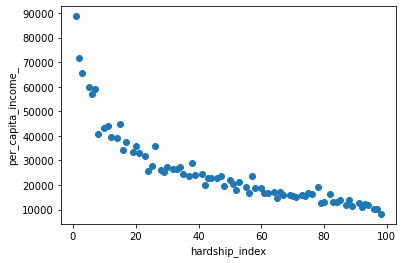

In [96]:
plt.scatter(x=X, y=Y, marker='o');
plt.xlabel('hardship_index')
plt.ylabel('per_capita_income_')

As per capital income increases, the hardship_index reduces also.